In [15]:
import pandas as pd
from sklearn import preprocessing

In [16]:
county = pd.read_csv('..\data\Aggregated\main_county.csv')

drop variables that provide direct info on survival or naloxone administration

In [17]:
leak_vars = ['% Naloxone Admin', '% OD Survival']
#drop_vars = ['Incidents - Opium', 'Arrests - Opium', 'Drug Quantity - Opium',
#            '3+ Prescribers and 3+ Dispensers', 'Average Daily MME > 50', 
#            'Arrests - Heroin', 'Incidents - Heroin', 'Arrests - Fentanyl', 'Drug Quantity - Fentanyl',
#            'Drug Quantity - Heroin', 'Incidents - Fentanyl']
county = county.drop(leak_vars, axis = 1)
#county = county.drop(drop_vars, axis = 1)

just pull 2021 numbers

In [18]:
county = county[county['Year'] == 2021]

In [19]:
county = county.drop('Year', axis=1)

In [20]:
county_list = county['County']
county = county.drop('County', axis = 1)
county_columns = county.columns

Standardize dataset

In [21]:
county = county.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
std_scaler = preprocessing.StandardScaler()
# county_scaled = min_max_scaler.fit_transform(county)
county_scaled = std_scaler.fit_transform(county)
county = pd.DataFrame(county_scaled)

In [22]:
county.columns = county_columns
county = county.fillna(0)

In [23]:
county.columns

Index(['Opioid Overdoses', '3+ Prescribers and 3+ Dispensers',
       'Average Daily MME > 50',
       'Overlapping Opioid/Benzodiazepine Prescriptions',
       'Total Drug Dispensation', 'Total Prescriptions',
       'Incidents - Fentanyl', 'Incidents - Heroin', 'Incidents - Opium',
       'Arrests - Fentanyl', 'Arrests - Heroin', 'Arrests - Opium',
       'Drug Quantity - Fentanyl', 'Drug Quantity - Heroin',
       'Drug Quantity - Opium', '%Incidents Fentanyl', '%Arrests Fentanyl',
       '%Quantity Fentanyl', 'Drug Take-Back Sites',
       'Drug Treatment Locations', 'County Population',
       'County Percent Change Since 2010'],
      dtype='object')

In [24]:
county

,Opioid Overdoses,3+ Prescribers and 3+ Dispensers,Average Daily MME > 50,Overlapping Opioid/Benzodiazepine Prescriptions,Total Drug Dispensation,Total Prescriptions,Incidents - Fentanyl,Incidents - Heroin,Incidents - Opium,Arrests - Fentanyl,...,Drug Quantity - Fentanyl,Drug Quantity - Heroin,Drug Quantity - Opium,%Incidents Fentanyl,%Arrests Fentanyl,%Quantity Fentanyl,Drug Take-Back Sites,Drug Treatment Locations,County Population,County Percent Change Since 2010
0,-1.086414,0.464651,-0.349339,-0.443431,-0.418544,-1.108157,-0.288498,-0.144757,0.219105,-0.007337,...,0.503199,0.761619,-0.223917,-0.309008,-0.101611,0.976877,0.030799,-0.698723,1.322808,0.902475
1,-0.866522,0.161155,-0.756063,-0.686656,-1.075344,-1.497843,-0.466249,-0.477125,-0.241345,-0.339628,...,-0.347473,0.323889,-0.225857,-0.170617,-0.027691,-1.051889,-0.879555,-0.858621,1.172972,1.704674
2,-0.873671,1.506552,-0.080371,0.189432,0.583335,0.437776,-1.027762,-0.299627,-0.241345,-0.856916,...,-0.351572,-0.035775,-0.225857,-1.370145,-1.208729,-1.128638,0.026756,-0.289376,-0.120599,-0.043710
3,-0.571205,0.836545,0.787334,0.545613,-0.224595,-0.452591,-0.075067,-0.829203,-0.241345,-0.098936,...,0.770175,-0.388041,-0.225857,1.487210,1.610731,1.514194,-0.444191,-0.397172,1.569047,0.943613
4,-1.035790,0.801678,0.327311,-1.352992,-0.937721,-1.249235,-0.564921,-0.966619,-0.241345,-0.606197,...,0.402958,-0.294480,-0.225857,1.311795,0.740768,1.451050,-1.237898,0.018104,4.950504,1.293290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-1.222468,0.000000,1.360806,1.702239,-0.084588,1.708835,-1.027762,-0.890531,-0.241345,-0.856916,...,-0.351572,-0.388491,-0.225857,-1.370145,-1.208729,-1.128638,0.175471,0.088462,-0.578502,-1.339571
60,-0.886893,0.000000,1.309588,1.592079,0.546668,2.654090,1.080874,-0.883181,-0.241345,1.827348,...,-0.332246,-0.397899,-0.225857,2.868788,3.128901,1.457716,0.230241,-0.656022,-0.582518,-0.701925
61,-1.028268,-1.866423,1.708214,-0.806662,0.399891,1.335845,-0.401699,-0.854898,-0.241345,-0.358811,...,-0.350427,-0.393755,-0.225857,1.003657,1.502290,0.138504,-0.248839,1.347744,-0.536582,-1.442417
62,-0.683692,-0.858070,0.820159,-0.610995,-0.378056,0.863077,-1.027762,0.291730,-0.241345,-0.856916,...,-0.351572,-0.335271,-0.225857,-1.370145,-1.208729,-1.128638,3.678487,-0.424009,-0.656890,-1.010463


In [25]:
from sklearn import metrics

In [26]:
from sklearn.cluster import MeanShift
ms_clustering = MeanShift().fit(county)
ms_clustering.labels_

print(f'Silhouette Score - MeanShift:', metrics.silhouette_score(county, ms_clustering.labels_))
print(f'Calinski-Harabasz Score - MeanShift:', metrics.calinski_harabasz_score(county, ms_clustering.labels_))

print(ms_clustering.labels_)

Silhouette Score - MeanShift: 0.19802729331852714
Calinski-Harabasz Score - MeanShift: 5.425699225070604
[0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 5 1 0 0 0 0 0
 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 5 0 0 3]


In [27]:
from sklearn.cluster import AgglomerativeClustering
ag_clustering = AgglomerativeClustering(n_clusters = 6).fit(county)
ag_clustering.labels_

print(f'Silhouette Score - Agglomerative:', metrics.silhouette_score(county, ag_clustering.labels_))
print(f'Calinski-Harabasz Score - Agglomerative:', metrics.calinski_harabasz_score(county, ag_clustering.labels_))

Silhouette Score - Agglomerative: 0.16952183358735545
Calinski-Harabasz Score - Agglomerative: 8.952828810123002


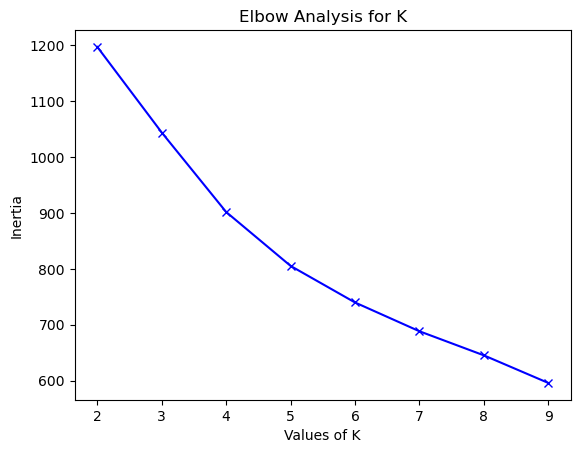

In [33]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
inertias = []
for num_clusters in range(2,10):
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state = 0, n_init=100).fit(county)
    inertias.append(kmeans.inertia_)

plt.plot(range(2,10),inertias,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('Elbow Analysis for K')
plt.show()

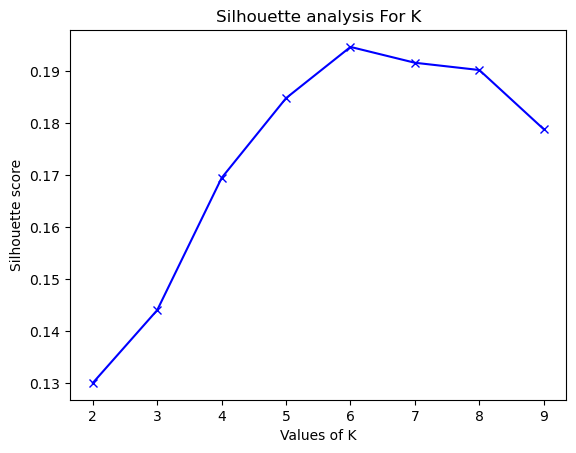

In [34]:

silhouette_scores = []
for num_clusters in range(2,10):
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state = 0, n_init=100).fit(county)
 
    # silhouette score
    silhouette_scores.append(metrics.silhouette_score(county, kmeans.labels_))

plt.plot(range(2,10),silhouette_scores,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For K')
plt.show()

In [35]:

kmeans = KMeans(n_clusters=6, random_state=0, n_init=100).fit(county)
kmeans.labels_
metrics.silhouette_score(county, kmeans.labels_)
print(f'Silhouette Score - Kmeans:', metrics.silhouette_score(county, kmeans.labels_))
print(f'Calinski-Harabasz Score - Kmeans:', metrics.calinski_harabasz_score(county, kmeans.labels_))

Silhouette Score - Kmeans: 0.19463626284489394
Calinski-Harabasz Score - Kmeans: 10.333008988927165


In [36]:
cluster_mapping = pd.DataFrame()

In [37]:
county_list.reset_index(drop=True, inplace=True)

In [38]:
kmeans.labels_

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 4, 0, 1, 0, 0, 1, 0, 4, 0, 0, 3,
       0, 0, 1, 0, 1, 1, 3, 5, 4, 3, 1, 0, 1, 1, 1, 2, 3, 0, 0, 1, 4, 1,
       1, 4, 3, 1, 1, 1, 3, 3, 1, 1, 2, 1, 3, 0, 1, 1, 4, 1, 1, 1])

In [39]:
cluster_mapping['County'] = county_list
cluster_mapping['Cluster'] = kmeans.labels_
#cluster_mapping['Cluster'] = ms_clustering.labels_
cluster_mapping.reset_index(drop=True,inplace=True)
cluster_mapping.to_csv('..\data\Aggregated\cluster_mapping.csv')

In [40]:
groups = cluster_mapping.groupby('Cluster')
for group in groups:
    print(group[1]['Cluster'].max())
    for c1 in group[1]['County']:
        print (c1)

0
Delaware
Chester
Bucks
Philadelphia
Cumberland
Montgomery
Pike
Centre
Dauphin
Lehigh
Allegheny
York
Lebanon
Franklin
Lancaster
Berks
Snyder
Northampton
Adams
Union
1
Beaver
Washington
Northumberland
Bradford
Blair
Lycoming
Mifflin
Westmoreland
Elk
Lackawanna
Lawrence
Wayne
Cambria
Clearfield
Tioga
Wyoming
Butler
Somerset
Jefferson
Clarion
Greene
Montour
Warren
Venango
Potter
Sullivan
2
Juniata
Bedford
3
Armstrong
Monroe
Crawford
Susquehanna
Perry
Fulton
Fayette
Indiana
Huntingdon
4
Carbon
Erie
Luzerne
Schuylkill
Columbia
Clinton
5
Mercer


In [41]:
county['County'] = county_list

In [42]:
county_clusters = county.merge(cluster_mapping, on='County')

In [43]:
county_clusters.drop('County', axis = 1).groupby('Cluster').mean()

,Opioid Overdoses,3+ Prescribers and 3+ Dispensers,Average Daily MME > 50,Overlapping Opioid/Benzodiazepine Prescriptions,Total Drug Dispensation,Total Prescriptions,Incidents - Fentanyl,Incidents - Heroin,Incidents - Opium,Arrests - Fentanyl,...,Drug Quantity - Fentanyl,Drug Quantity - Heroin,Drug Quantity - Opium,%Incidents Fentanyl,%Arrests Fentanyl,%Quantity Fentanyl,Drug Take-Back Sites,Drug Treatment Locations,County Population,County Percent Change Since 2010
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.359547,0.215094,-0.683072,-0.737575,-0.650990,-1.027093,-0.131579,-0.488467,-0.191768,-0.162569,...,0.227956,-0.170272,-0.217318,0.451366,0.425489,0.543575,-0.410311,-0.525204,0.846975,1.135935
1,-0.198111,-0.156603,0.556845,0.448884,0.434493,0.568320,-0.582400,-0.192191,-0.163543,-0.508983,...,-0.226546,-0.248259,-0.171228,-0.575851,-0.541565,-0.306102,0.473150,0.405520,-0.395904,-0.492277
2,-0.439277,-0.360845,-0.337740,0.114558,-0.958348,-0.254478,-0.861782,0.048946,5.374408,-0.724860,...,-0.350965,-0.295695,2.835252,-1.228847,-1.079632,-1.062595,-0.343950,-0.345561,-0.589254,-0.681356
3,0.721736,-0.353831,-0.035568,-0.292472,-0.191729,0.055640,1.132595,1.962917,-0.241345,1.007212,...,-0.319731,1.313728,-0.225857,-0.322306,-0.355756,-0.719848,-0.203682,0.202341,-0.450740,-0.688212
4,1.248643,0.463577,-0.135666,0.752017,0.647773,0.760923,1.650626,-0.346048,-0.241345,1.564330,...,0.077350,-0.168209,-0.225857,1.782538,1.722228,0.696060,-0.331777,-0.089738,-0.181148,-0.259686
5,-0.767089,0.894522,0.993056,0.971546,1.478613,1.208204,-0.599563,-0.921565,0.958822,-0.516234,...,4.446493,-0.362738,6.515641,0.608024,0.598617,1.514609,0.416040,-0.630958,-0.323937,-0.804771


In [44]:
incidents = pd.read_csv('..\data\Aggregated\incidents.csv')
with_clusters = incidents.merge(cluster_mapping[['County', 'Cluster']], left_on='Incident County Name', right_on='County')
cluster_survival = with_clusters.groupby('Cluster')
temp = cluster_survival.agg({'Survive':'sum'})
temp['Cases'] = cluster_survival.size()

temp['% Survival'] = (temp['Survive'] / temp['Cases']) * 100
temp.reset_index(inplace=True)
temp.rename(columns = {'% survive': '% Survival'}, inplace = True)

In [45]:
temp

,Cluster,Survive,Cases,% Survival
0,0,9665,12667,76.300624
1,1,2429,3499,69.419834
2,2,48,89,53.932584
3,3,968,1402,69.044223
4,4,2194,2715,80.810313
5,5,168,197,85.279188
